In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from matplotlib.dates import date2num

C:\Users\Liliana\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Glucose Datasets#
subject1=pd.read_csv(r'C:\Users\Liliana\StatisticalData\Diabetes-Data\data-01.csv',parse_dates=[['Column1','Column2']])
subject2=pd.read_csv(r'C:\Users\Liliana\StatisticalData\Diabetes-Data\data-02.csv',names=['Date','Time','Code','Glucose(mg/dl)-Subject 2'])
subject30=pd.read_csv(r'C:\Users\Liliana\StatisticalData\Diabetes-Data\data-30.csv',parse_dates=[['Column1','Column2']])

In [3]:
#Rename Column Names
subject1.rename(columns={'Column1_Column2':'Date','Column3':'Code','Column4':'Glucose(mg/dl)-Subject 1'},inplace=True)
subject30.rename(columns={'Column1_Column2':'Date','Column3':'Code','Column4':'Glucose(mg/dl)-Subject 30'},inplace=True)

In [4]:
#Clean Dataset for Subject 2
subject2=subject2[subject2["Glucose(mg/dl)-Subject 2"]!="0Hi"]
subject2=subject2[subject2["Glucose(mg/dl)-Subject 2"]!="0Lo"]

In [5]:
#Transforming to Numerical and Datetime Values
subject2["Glucose(mg/dl)-Subject 2"]=pd.to_numeric(subject2["Glucose(mg/dl)-Subject 2"])
subject2[['Date','Time']] = subject2[['Date','Time']].apply(pd.to_datetime, errors='coerce')
subject1['Date']=pd.to_datetime(subject1['Date'])
subject30['Date']=pd.to_datetime(subject30['Date'])

In [6]:
#Describe Statistic
sub1_desc=subject1['Glucose(mg/dl)-Subject 1'].describe()
sub2_desc=subject2['Glucose(mg/dl)-Subject 2'].describe()
sub30_desc=subject30['Glucose(mg/dl)-Subject 30'].describe()
frames=[sub1_desc,sub2_desc,sub30_desc]
TableDescription=pd.concat(frames,axis=1)
TableDescription.round(1)

,Glucose(mg/dl)-Subject 1,Glucose(mg/dl)-Subject 2,Glucose(mg/dl)-Subject 30
count,943.0,754.0,1179.0
mean,67.4,101.1,81.6
std,85.6,106.3,80.2
min,0.0,4.0,3.0
25%,7.0,10.0,6.0
50%,15.0,18.0,39.0
75%,122.0,191.0,151.5
max,343.0,393.0,319.0


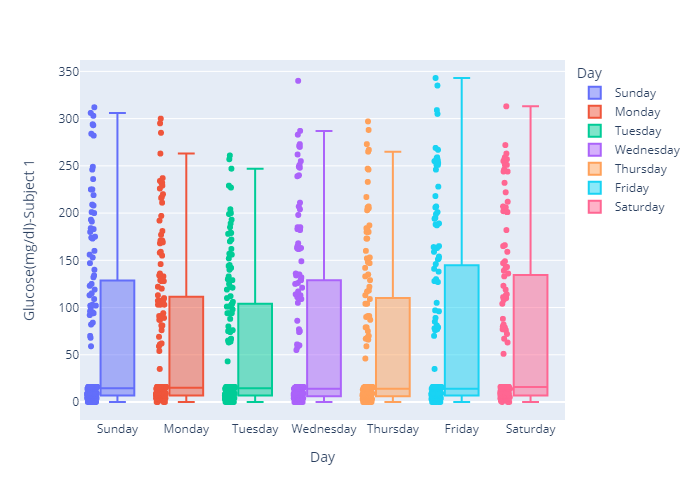

In [7]:
#Day of the Week Boxplot for Subject 1
subject1['Day']=subject1['Date'].dt.day_name()
fig=px.box(subject1,x="Day",y='Glucose(mg/dl)-Subject 1',points='all',color='Day')
fig.show("png")


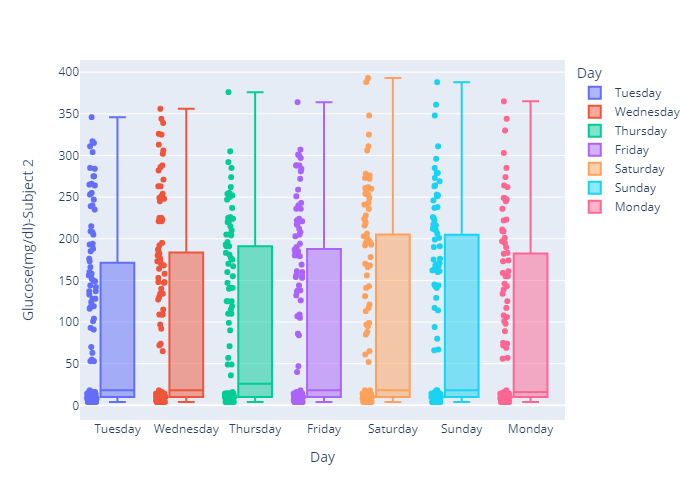

In [8]:
#Day of the Week Boxplot for Subject 2
subject2['Day']=subject2['Date'].dt.day_name()
fig=px.box(subject2,x="Day",y='Glucose(mg/dl)-Subject 2',points='all',color='Day')
fig.show("png")

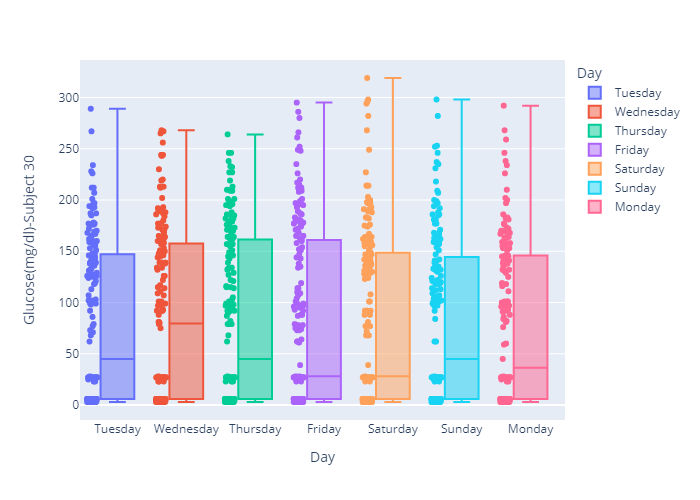

In [9]:
#Day of the Week Boxplot for Subject 30
subject30['Day']=subject30['Date'].dt.day_name()
fig=px.box(subject30,x="Day",y='Glucose(mg/dl)-Subject 30',points='all',color='Day')
fig.show("png")

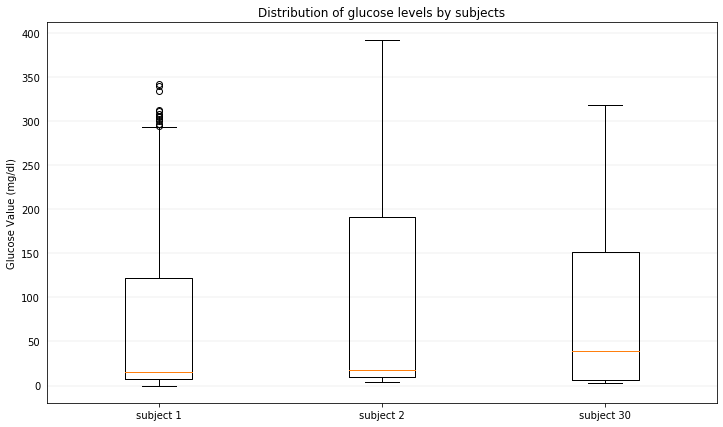

In [10]:
#Vertical Boxplot by Subjects
fig, ax = plt.subplots(figsize=(12, 7))
# Remove borders
#ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Distribution of glucose levels by subjects')

#pd.array
GlucoseValues=[subject1['Glucose(mg/dl)-Subject 1'],subject2['Glucose(mg/dl)-Subject 2'],subject30['Glucose(mg/dl)-Subject 30']]
GlucoseValues=pd.array(GlucoseValues,dtype=object)
labels=["subject 1","subject 2","subject 30"]
ax.boxplot(GlucoseValues, labels=labels)
ax.set_ylabel('Glucose Value (mg/dl)')
plt.show()

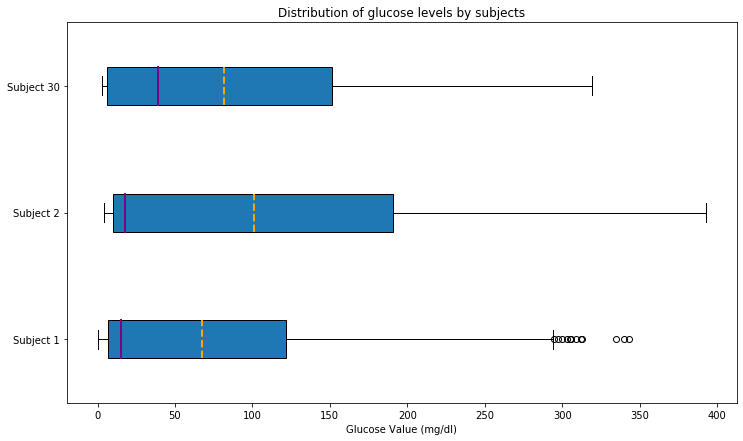

In [11]:
#Horizontal Boxplot by Subjects
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Distribution of glucose levels by subjects')
x=np.array(subject1['Glucose(mg/dl)-Subject 1'],dtype=object)
y=np.array(subject2['Glucose(mg/dl)-Subject 2'],dtype=object)
z=np.array(subject30['Glucose(mg/dl)-Subject 30'],dtype=object)
ax.set_xlabel('Glucose Value (mg/dl)')

ax.boxplot((x,y,z), vert=False, showmeans=True, meanline=True,
           labels=('Subject 1', 'Subject 2', 'Subject 30'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'orange'})

plt.show()